# Decision trees

Principle : Imagine you want to distinguish between the following four animals: bears, hawks, penguins, and dolphins. Your goal is to get to the right answer by asking as few if/else questions as possible. You might start off by asking whether the animal has feathers, a question that narrows down your possible animals to just two. If the answer is “yes,” you can ask another question that could help you distinguish between hawks and penguins. For example, you could ask whether the animal can fly. If the animal doesn’t have feathers, your possible animal choices are dolphins and bears, and you will need to ask a question to distinguish between these two animals—for example, asking whether the animal has fins.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

### First test

In [4]:
gt = pd.read_csv('../dumps/2020.01.13-14.25.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(data_train, target_train)
print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.759


The presence of pure leaves mean that a tree is 100% accurate on the training set; each data point in the training set is in a leaf that has the correct majority class. This is exactly what we can see from this result. We clearly fall into the trap of overfitting, meaning that this case is quite bad at generalization. This might be avoided by using two different strategies : *pre-pruning*, which will stop the creation of the tree before reaching the pure leaves, or *post-pruning*, which consists in collapsing or removing nodes with small information after the complete creation. For the first one, it can be done by limiting the depth, the number of leaves or either fixing a minimum number of nodes.

### Further tests

Let's now carry on with a bigger dataset and try with different values of the parameters.

In [2]:
gt = pd.read_csv('../dumps/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

#### Depth

Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set:

In [4]:
for i in range(1,10):
    print("Depth set to %s" % i)
    tree = DecisionTreeClassifier(max_depth=i, random_state=0) 
    tree.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

Depth set to 1
Accuracy on training set: 0.895
Accuracy on test set: 0.900
Depth set to 2
Accuracy on training set: 0.912
Accuracy on test set: 0.915
Depth set to 3
Accuracy on training set: 0.918
Accuracy on test set: 0.915
Depth set to 4
Accuracy on training set: 0.924
Accuracy on test set: 0.923
Depth set to 5
Accuracy on training set: 0.930
Accuracy on test set: 0.919
Depth set to 6
Accuracy on training set: 0.935
Accuracy on test set: 0.917
Depth set to 7
Accuracy on training set: 0.941
Accuracy on test set: 0.911
Depth set to 8
Accuracy on training set: 0.945
Accuracy on test set: 0.911
Depth set to 9
Accuracy on training set: 0.951
Accuracy on test set: 0.908


As we can see, increasing the depth value improves the accuracy of the training set but not necessarily of the test set. The best result we get at depth 4, which offers a good compromise between the two accuracies.

#### Minimum number of samples (split)

*min_samples_split* represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.

In [7]:
for i in range(1,11):
    n_samples = i/10
    print("min_samples_split set to %s" % n_samples)
    tree = DecisionTreeClassifier(min_samples_split=n_samples, random_state=0) 
    tree.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

Depth set to 0.1
Accuracy on training set: 0.915
Accuracy on test set: 0.898
Depth set to 0.2
Accuracy on training set: 0.896
Accuracy on test set: 0.886
Depth set to 0.3
Accuracy on training set: 0.895
Accuracy on test set: 0.898
Depth set to 0.4
Accuracy on training set: 0.895
Accuracy on test set: 0.900
Depth set to 0.5
Accuracy on training set: 0.895
Accuracy on test set: 0.900
Depth set to 0.6
Accuracy on training set: 0.895
Accuracy on test set: 0.900
Depth set to 0.7
Accuracy on training set: 0.895
Accuracy on test set: 0.900
Depth set to 0.8
Accuracy on training set: 0.895
Accuracy on test set: 0.900
Depth set to 0.9
Accuracy on training set: 0.895
Accuracy on test set: 0.900
Depth set to 1.0
Accuracy on training set: 0.895
Accuracy on test set: 0.900


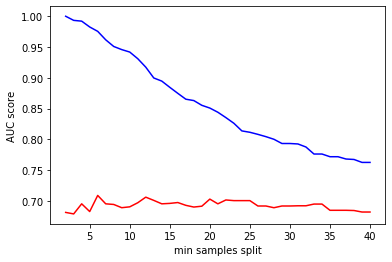

In [22]:
min_samples_splits = range(2,41)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=0)
   dt.fit(data_train, target_train)
   train_pred = dt.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [21]:
for i in range(2,11):
    print("min_samples_split set to %s" % i)
    tree = DecisionTreeClassifier(min_samples_split=i, random_state=0) 
    tree.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

min_samples_split set to 2
Accuracy on training set: 1.000
Accuracy on test set: 0.869
min_samples_split set to 3
Accuracy on training set: 0.999
Accuracy on test set: 0.870
min_samples_split set to 4
Accuracy on training set: 0.997
Accuracy on test set: 0.879
min_samples_split set to 5
Accuracy on training set: 0.995
Accuracy on test set: 0.872
min_samples_split set to 6
Accuracy on training set: 0.991
Accuracy on test set: 0.878
min_samples_split set to 7
Accuracy on training set: 0.988
Accuracy on test set: 0.879
min_samples_split set to 8
Accuracy on training set: 0.984
Accuracy on test set: 0.872
min_samples_split set to 9
Accuracy on training set: 0.982
Accuracy on test set: 0.883
min_samples_split set to 10
Accuracy on training set: 0.981
Accuracy on test set: 0.880


#### Minimum number of samples (leaf)

*min_samples_leaf* is the minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples at the leafs, the base of the tree.

In [31]:
for i in range(2,11):
    print("min_samples_split set to %s" % i)
    tree = DecisionTreeClassifier(min_samples_leaf=i, random_state=0) 
    tree.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

min_samples_split set to 2
Accuracy on training set: 0.986
Accuracy on test set: 0.885
min_samples_split set to 3
Accuracy on training set: 0.978
Accuracy on test set: 0.876
min_samples_split set to 4
Accuracy on training set: 0.971
Accuracy on test set: 0.881
min_samples_split set to 5
Accuracy on training set: 0.966
Accuracy on test set: 0.885
min_samples_split set to 6
Accuracy on training set: 0.962
Accuracy on test set: 0.885
min_samples_split set to 7
Accuracy on training set: 0.953
Accuracy on test set: 0.887
min_samples_split set to 8
Accuracy on training set: 0.948
Accuracy on test set: 0.887
min_samples_split set to 9
Accuracy on training set: 0.945
Accuracy on test set: 0.883
min_samples_split set to 10
Accuracy on training set: 0.941
Accuracy on test set: 0.899


#### Number of features

*max_features* represents the number of features to consider when looking for the best split. Since we're working with 119 different features, let's try all the values and see how relevant they are.

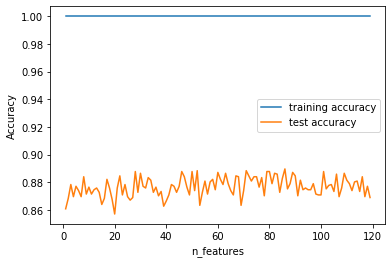

In [30]:
training_accuracy = [] 
test_accuracy = []
settings = range(1, 120)
for f in settings:
    clf = DecisionTreeClassifier(max_features=f, random_state=0) #n_jobs means that we use all processors
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(settings, training_accuracy, label="training accuracy") 
plt.plot(settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_features")
plt.legend()

As we can see from the graph, not all features are important in making the classification. Further selection on relevant features will be made.